<h1>Hotel Booking Analysis RPP</h1>
<h2>Exploring the Impact of Booking Cancellations and Variables Associated with Cancellations</h2>

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
mpl.rcParams['figure.figsize'] = (15,5)

<h5>Part 1. Understanding the data and creating a dimmensional model to optimize data space.</h5>

<img src = /work/dbdiagrams.png>

In [ ]:
hotel_bookings = pd.read_csv(r'/work/hotel_bookings.csv')

In [ ]:
hotel_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
hotel_bookings.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


<h3>Subsetting Data for Cancelled and Completed Bookings</h3>
<h5>Let's Look at the Potentail Impact of Booking Cancellations</h5>

In [ ]:
completed_bookings = hotel_bookings[hotel_bookings['is_canceled'] == 0]
cancelled_bookings = hotel_bookings[hotel_bookings['is_canceled'] == 1]

In [ ]:
completed_bookings['is_canceled'].count()

75166

In [ ]:
cancelled_bookings['is_canceled'].count()

44224

In [ ]:
completed_bookings['adr'].sum()

7515674.93

In [ ]:
cancelled_bookings['adr'].sum().round(2)

4641942.67

In [ ]:
cancelled_bookings['is_canceled'].count() / hotel_bookings['is_canceled'].count()

0.37041628277075134

<h5>37.04% of hotel bookings were eventually cancelled. We want to explore potential revenue losses from these cancellations however every booking will potentially have a different number of days stayed, so we will have to create a new column for this variable</h5> 

In [ ]:
completed_bookings['total_nights_stayed'] = completed_bookings['stays_in_weekend_nights'] + completed_bookings['stays_in_week_nights']
cancelled_bookings['total_nights_stayed'] = cancelled_bookings['stays_in_weekend_nights'] + cancelled_bookings['stays_in_week_nights']

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
hotel_bookings['total_nights_stayed'] = hotel_bookings['stays_in_weekend_nights'] + hotel_bookings['stays_in_week_nights']
hotel_bookings['adr*nights_stayed'] = hotel_bookings['adr'] * hotel_bookings['total_nights_stayed']

In [ ]:
completed_bookings['adr*nights_stayed'] = completed_bookings['adr'] * completed_bookings['total_nights_stayed']
cancelled_bookings['adr*nights_stayed'] = cancelled_bookings['adr'] * cancelled_bookings['total_nights_stayed']

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<h3>What is our percieved losses from booking cancellations? Which hotel type had more cancellations? Which experiences higher potential losses?</h3>

In [ ]:
losses_cancelled_bookings = cancelled_bookings['adr*nights_stayed'].sum().round(2)
print(losses_cancelled_bookings)

16727237.12


In [ ]:
completed_bookings_revenue = completed_bookings['adr*nights_stayed'].sum().round(2)
print(completed_bookings_revenue)

25996260.41


In [ ]:
16727237.12/(16727237.12+25996260.41) * 100

39.15231216324063

<h5>39.15% of total revenues are being lost to booking cancellations. If we can even save a small fraction of travlers from cancelling, it would mkae a huge difference. Let's find out which variables are most associated to booking cancellations.</h5>

In [ ]:
cancelled_bookings['hotel'].value_counts()

City Hotel      33102
Resort Hotel    11122
Name: hotel, dtype: int64

In [ ]:
city_hotel_losses = cancelled_bookings[cancelled_bookings['hotel'] == 'City Hotel']['adr*nights_stayed'].sum()
resort_hotel_losses = cancelled_bookings[cancelled_bookings['hotel'] == 'Resort Hotel']['adr*nights_stayed'].sum()
print(f"City Hotel bookings cancellations potential losses: {city_hotel_losses}")
print(f"Resort Hotel bookings cancellations potential losses: {resort_hotel_losses}")

City Hotel bookings cancellations potential losses: 10885059.78
Resort Hotel bookings cancellations potential losses: 5842177.34


In [ ]:
city_hotel_losses / (city_hotel_losses + resort_hotel_losses)

0.6507386546810666

<h5>Total potential losses from cancelled bookings comes to a <strong>whopping</strong> 16,727,237.12 with the majority of cancelled bookings made to City Hotels. City Hotel booking cancellations constitute 65.07% of perceived losses at 10,885,059.78. Let's take a look at a rolling sum of perceived losses from our arbitrary start date. Are there any seasonal spikes in perceived losses from city hotel or resort hotel booking cancellations based on arrival date and booking date?</h5>

In [ ]:
#Formatting and Creating Date Columns for Booking Date and Booking Arrival Date
#converting month column to integer
filters = [
    hotel_bookings['arrival_date_month'] == 'July',
    hotel_bookings['arrival_date_month'] == 'August',
    hotel_bookings['arrival_date_month'] == 'September',
    hotel_bookings['arrival_date_month'] == 'October',
    hotel_bookings['arrival_date_month'] == 'November',
    hotel_bookings['arrival_date_month'] == 'December',
    hotel_bookings['arrival_date_month'] == 'January',
    hotel_bookings['arrival_date_month'] == 'February',
    hotel_bookings['arrival_date_month'] == 'March',
    hotel_bookings['arrival_date_month'] == 'April',
    hotel_bookings['arrival_date_month'] == 'May',
    hotel_bookings['arrival_date_month'] == 'June',
]

values = [7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6]

hotel_bookings['month_num'] = np.select(filters, values)
hotel_bookings.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights_stayed,adr*nights_stayed,month_num
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,0.0,7
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,0.0,7
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,75.0,7
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,75.0,7
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,Transient,98.0,0,1,Check-Out,2015-07-03,2,196.0,7


In [ ]:
hotel_bookings['year'] = hotel_bookings['arrival_date_year']
hotel_bookings['month'] = hotel_bookings['month_num']
hotel_bookings['day'] = hotel_bookings['arrival_date_day_of_month']

In [ ]:
import datetime as dt

In [ ]:
hotel_bookings['arrival_date'] = pd.to_datetime(hotel_bookings[['year', 'month', 'day']]).dt.date
hotel_bookings.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,total_of_special_requests,reservation_status,reservation_status_date,total_nights_stayed,adr*nights_stayed,month_num,year,month,day,arrival_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,Check-Out,2015-07-01,0,0.0,7,2015,7,1,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,Check-Out,2015-07-01,0,0.0,7,2015,7,1,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,Check-Out,2015-07-02,1,75.0,7,2015,7,1,2015-07-01
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,Check-Out,2015-07-02,1,75.0,7,2015,7,1,2015-07-01
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,1,Check-Out,2015-07-03,2,196.0,7,2015,7,1,2015-07-01


In [ ]:
hotel_bookings['booking_date'] = hotel_bookings['arrival_date'] - pd.to_timedelta(hotel_bookings['lead_time'], unit='D')
hotel_bookings.head()

/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/arrays/datetimelike.py:1111: PerformanceWarning: Adding/subtracting object-dtype array to TimedeltaArray not vectorized
  PerformanceWarning,


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reservation_status,reservation_status_date,total_nights_stayed,adr*nights_stayed,month_num,year,month,day,arrival_date,booking_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Check-Out,2015-07-01,0,0.0,7,2015,7,1,2015-07-01,2014-07-24
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Check-Out,2015-07-01,0,0.0,7,2015,7,1,2015-07-01,2013-06-24
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Check-Out,2015-07-02,1,75.0,7,2015,7,1,2015-07-01,2015-06-24
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Check-Out,2015-07-02,1,75.0,7,2015,7,1,2015-07-01,2015-06-18
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Check-Out,2015-07-03,2,196.0,7,2015,7,1,2015-07-01,2015-06-17


In [ ]:
completed_bookings = hotel_bookings[hotel_bookings['is_canceled'] == 0]
cancelled_bookings = hotel_bookings[hotel_bookings['is_canceled'] == 1]

In [ ]:
#subsetting dataset to city hotel and resort hotel bookings
city_hotel_df = cancelled_bookings[cancelled_bookings['hotel'] == 'City Hotel']
resort_hotel_df = cancelled_bookings[cancelled_bookings['hotel'] == 'Resort Hotel']
city_hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reservation_status,reservation_status_date,total_nights_stayed,adr*nights_stayed,month_num,year,month,day,arrival_date,booking_date
40061,City Hotel,1,88,2015,July,27,1,0,4,2,...,Canceled,2015-07-01,4,306.0,7,2015,7,1,2015-07-01,2015-04-04
40062,City Hotel,1,65,2015,July,27,1,0,4,1,...,Canceled,2015-04-30,4,272.0,7,2015,7,1,2015-07-01,2015-04-27
40063,City Hotel,1,92,2015,July,27,1,2,4,2,...,Canceled,2015-06-23,6,459.0,7,2015,7,1,2015-07-01,2015-03-31
40064,City Hotel,1,100,2015,July,27,2,0,2,2,...,Canceled,2015-04-02,2,153.0,7,2015,7,2,2015-07-02,2015-03-24
40065,City Hotel,1,79,2015,July,27,2,0,3,2,...,Canceled,2015-06-25,3,229.5,7,2015,7,2,2015-07-02,2015-04-14


In [ ]:
city_hotel_df['arrival_date_year'].unique()

array([2015, 2016, 2017])

In [ ]:
city_2015 = city_hotel_df[city_hotel_df['arrival_date_year'] == 2015]
city_2016 = city_hotel_df[city_hotel_df['arrival_date_year'] == 2016]
city_2017 = city_hotel_df[city_hotel_df['arrival_date_year'] == 2017]

In [ ]:
city_2015_df = city_2015.groupby('arrival_date').sum()['adr*nights_stayed'].reset_index()
city_2015_df_cumsum = city_2015_df.set_index('arrival_date').cumsum().reset_index()

city_2016_df = city_2016.groupby('arrival_date').sum()['adr*nights_stayed'].reset_index()
city_2016_df_cumsum = city_2016_df.set_index('arrival_date').cumsum().reset_index()

city_2017_df = city_2017.groupby('arrival_date').sum()['adr*nights_stayed'].reset_index()
city_2017_df_cumsum = city_2017_df.set_index('arrival_date').cumsum().reset_index()


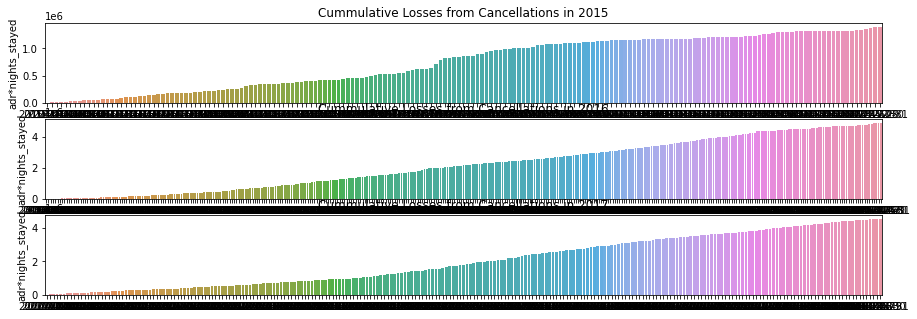

In [ ]:
plt.subplot(3, 1, 1)
sns.barplot(x='arrival_date', y='adr*nights_stayed', data=city_2015_df_cumsum).set(title='Cummulative Losses from Cancellations in 2015', xlabel=None)
plt.subplot(3, 1, 2)
sns.barplot(x='arrival_date', y='adr*nights_stayed', data=city_2016_df_cumsum).set(title='Cummulative Losses from Cancellations in 2016', xlabel=None)
plt.subplot(3, 1, 3)
sns.barplot(x='arrival_date', y='adr*nights_stayed', data=city_2017_df_cumsum).set(title='Cummulative Losses from Cancellations in 2017', xlabel=None)
plt.show()

<h5>Perceived losses from cancellations based on arrival date seems to increase at consistent rate from the start of the year through to the end of year. In 2015 theres a small spike mid year in the summertime. Let's continue the rest of the project and begin to choose our variables for our logisitc regression model.</h5>

<h3>Steps to our Linear Regression Model</h3>
<h5>1. Exploring Variables Further and Choosing Variables</h5>
<h5>2. Outlier Analysis</h5>
<h5>3. Distribution and Correlation Analysis</h5>
<h5>4. Feature Engineering</h5>
<h5>5. Fit Logisitic Regression Model</h5>
<h5>6. Confusion Matrix to Test Models Precision and Accurancy</h5>
<h5>7. Coefficient Analysis</h5>

In [ ]:
hotel_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 40 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
hotel_bookings.market_segment.unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [ ]:
hotel_bookings.distribution_channel.unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [ ]:
hotel_bookings.agent.unique()

array([ nan, 304., 240., 303.,  15., 241.,   8., 250., 115.,   5., 175.,
       134., 156., 243., 242.,   3., 105.,  40., 147., 306., 184.,  96.,
         2., 127.,  95., 146.,   9., 177.,   6., 143., 244., 149., 167.,
       300., 171., 305.,  67., 196., 152., 142., 261., 104.,  36.,  26.,
        29., 258., 110.,  71., 181.,  88., 251., 275.,  69., 248., 208.,
       256., 314., 126., 281., 273., 253., 185., 330., 334., 328., 326.,
       321., 324., 313.,  38., 155.,  68., 335., 308., 332.,  94., 348.,
       310., 339., 375.,  66., 327., 387., 298.,  91., 245., 385., 257.,
       393., 168., 405., 249., 315.,  75., 128., 307.,  11., 436.,   1.,
       201., 183., 223., 368., 336., 291., 464., 411., 481.,  10., 154.,
       468., 410., 390., 440., 495., 492., 493., 434.,  57., 531., 420.,
       483., 526., 472., 429.,  16., 446.,  34.,  78., 139., 252., 270.,
        47., 114., 301., 193., 182., 135., 350., 195., 352., 355., 159.,
       363., 384., 360., 331., 367.,  64., 406., 16

In [ ]:
hotel_bookings.company.unique()

array([ nan, 110., 113., 270., 178., 240., 154., 144., 307., 268.,  59.,
       204., 312., 318.,  94., 174., 274., 195., 223., 317., 281., 118.,
        53., 286.,  12.,  47., 324., 342., 373., 371., 383.,  86.,  82.,
       218.,  88.,  31., 397., 392., 405., 331., 367.,  20.,  83., 416.,
        51., 395., 102.,  34.,  84., 360., 394., 457., 382., 461., 478.,
       386., 112., 486., 421.,   9., 308., 135., 224., 504., 269., 356.,
       498., 390., 513., 203., 263., 477., 521., 169., 515., 445., 337.,
       251., 428., 292., 388., 130., 250., 355., 254., 543., 531., 528.,
        62., 120.,  42.,  81., 116., 530., 103.,  39.,  16.,  92.,  61.,
       501., 165., 291., 290.,  43., 325., 192., 108., 200., 465., 287.,
       297., 490., 482., 207., 282., 437., 225., 329., 272.,  28.,  77.,
       338.,  72., 246., 319., 146., 159., 380., 323., 511., 407., 278.,
        80., 403., 399.,  14., 137., 343., 346., 347., 349., 289., 351.,
       353.,  54.,  99., 358., 361., 362., 366., 37

In [ ]:
hotel_bookings.customer_type.unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [ ]:
hotel_bookings.reservation_status.unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

<h5>After careful consideration, I have chosen variables that could be most associated with booking cancellations. Varibales that did not make the cut, were either inconsequential (ie. required_parking_spaces), had too many Nans that cannot be replaced (ie. company_id), and other variables that are uncontrollable and do not reflect either a customer or party behaviour. There were also somewhat redundant variables (ie. market segment and distribution channel), so I simply chose one over the other.</h5> 

In [ ]:
hotel_bookings['children+babies'] = hotel_bookings['children'] + hotel_bookings['babies']

In [ ]:
hotel_bookings_model = hotel_bookings[['hotel', 'lead_time', 'adults', 'children+babies', 'country', 
                                        'market_segment', 'is_repeated_guest', 'previous_cancellations', 
                                        'reserved_room_type', 'deposit_type', 'agent', 'days_in_waiting_list',
                                        'customer_type', 'adr', 'total_of_special_requests', 'total_nights_stayed',
                                        'adr*nights_stayed', 'arrival_date_month']]

hotel_bookings_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   hotel                      119390 non-null  object 
 1   lead_time                  119390 non-null  int64  
 2   adults                     119390 non-null  int64  
 3   children+babies            119386 non-null  float64
 4   country                    118902 non-null  object 
 5   market_segment             119390 non-null  object 
 6   is_repeated_guest          119390 non-null  int64  
 7   previous_cancellations     119390 non-null  int64  
 8   reserved_room_type         119390 non-null  object 
 9   deposit_type               119390 non-null  object 
 10  agent                      103050 non-null  float64
 11  days_in_waiting_list       119390 non-null  int64  
 12  customer_type              119390 non-null  object 
 13  adr                        11

<h3>Outlier Analysis on Chosen Numerical Values</h3>

<AxesSubplot:>

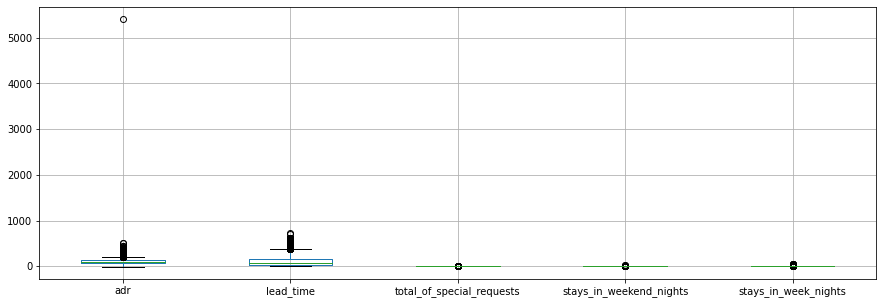

In [ ]:
hotel_bookings.boxplot(column=['adr', 'lead_time', 'total_of_special_requests', 'stays_in_weekend_nights', 'stays_in_week_nights'])

<AxesSubplot:>

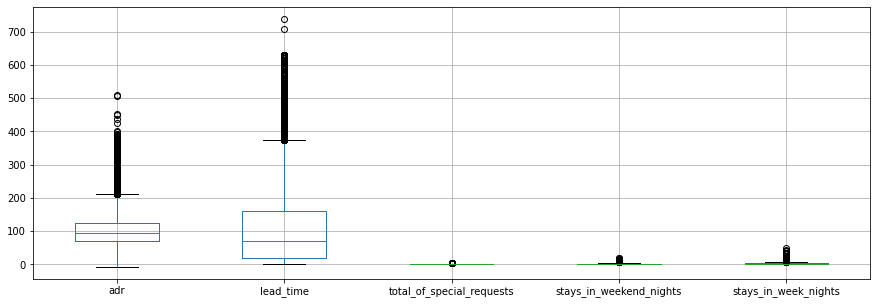

In [ ]:
###Removing large ADR outlier and recreating boxplot
hotel_bookings = hotel_bookings[hotel_bookings['adr'] != 5400.0]
hotel_bookings.boxplot(column=['adr', 'lead_time', 'total_of_special_requests', 'stays_in_weekend_nights', 'stays_in_week_nights'])

In [ ]:
hotel_bookings_model = hotel_bookings[['hotel', 'lead_time', 'adults', 'children+babies', 'country', 
                                        'market_segment', 'is_repeated_guest', 'previous_cancellations', 
                                        'reserved_room_type', 'deposit_type', 'agent', 'days_in_waiting_list',
                                        'customer_type', 'adr', 'total_of_special_requests', 'total_nights_stayed',
                                        'adr*nights_stayed', 'arrival_date_month', 'is_canceled']]

<AxesSubplot:>

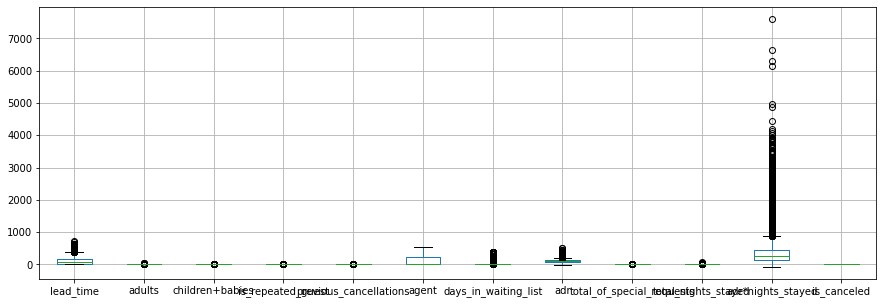

In [ ]:
hotel_bookings_model.boxplot()

<h5>Adr Outlier has been removed so data will be less skewed based on one extreme data point. Tbere are several outliers for total cost of stay, but this is not surprising given their will always be a population of people that spend the big bucks when going for vacation or place to stay.</h5>

<h3>Closer Look at Distribution and Correlation Between Variables

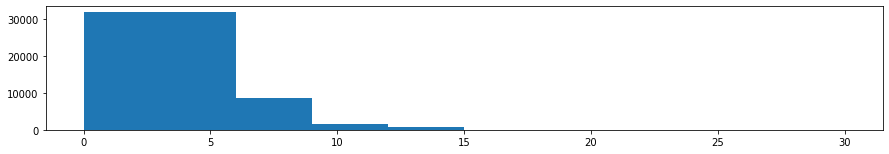

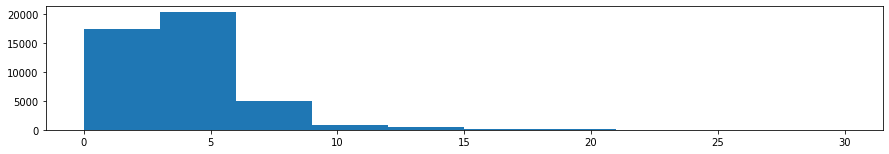

In [ ]:
Condition_0 = hotel_bookings['is_canceled']==0 ##completed booking
Condition_1 = hotel_bookings['is_canceled']==1

plt.subplot(2, 1, 1)
plt.hist(hotel_bookings[Condition_0]['total_nights_stayed'], range=(0,30))
plt.show()
plt.subplot(2, 1, 2)
plt.hist(hotel_bookings[Condition_1]['total_nights_stayed'], range=(0,30))
plt.show()

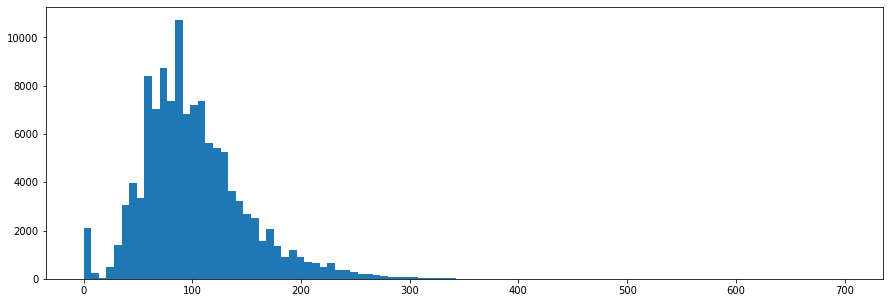

In [ ]:
###distribution of hotel bookings average daily rate
plt.hist(hotel_bookings.adr, range=[0, 700], bins=100)
plt.show()

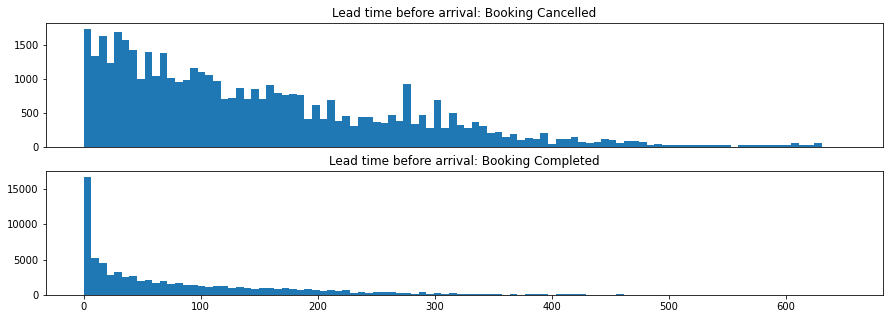

In [ ]:
###Lead time before arrival for cancelled and compelted bookings
plt.subplot(2, 1, 1)
ax = plt.hist(cancelled_bookings['lead_time'], bins=100, range=[0,650])
plt.title('Lead time before arrival: Booking Cancelled')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.subplot(2, 1, 2)
plt.hist(completed_bookings['lead_time'], bins=100, range=[0,650])
plt.title('Lead time before arrival: Booking Completed')
plt.show()

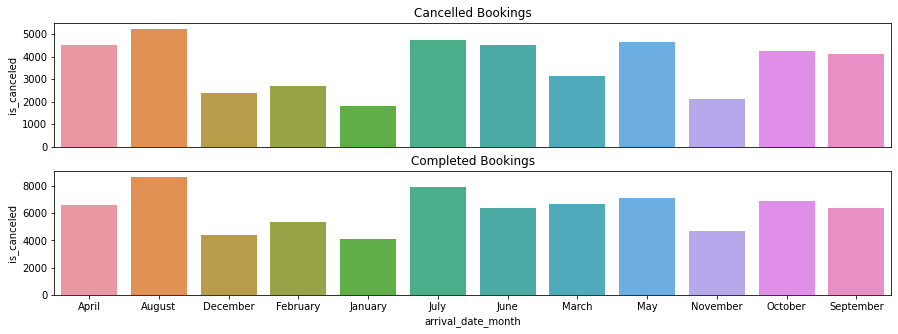

In [ ]:
###Which month were cancelled and completed bookings being made
number_cancelled_arrival_month = cancelled_bookings.groupby('arrival_date_month').count()['is_canceled'].reset_index()
number_completed_arrival_month = completed_bookings.groupby('arrival_date_month').count()['is_canceled'].reset_index()
plt.subplot(2, 1, 1)
sns.barplot(x='arrival_date_month', y='is_canceled', data=number_cancelled_arrival_month).set(title='Cancelled Bookings', xlabel=None)
plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=False)
plt.subplot(2, 1, 2)
sns.barplot(x='arrival_date_month', y='is_canceled', data=number_completed_arrival_month).set(title='Completed Bookings')
plt.show()

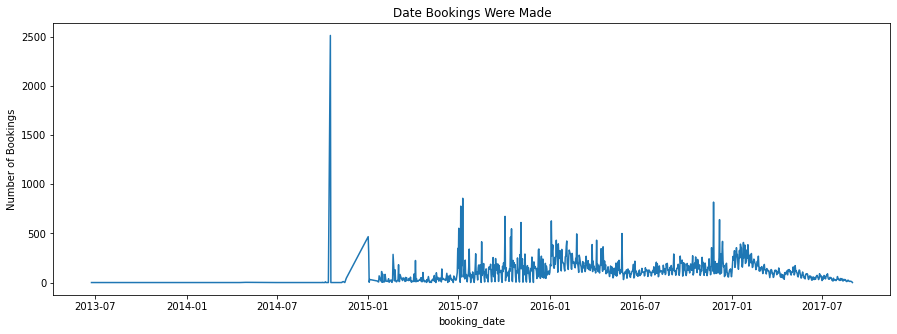

In [ ]:
###When travelers are making their bookings over 2015-2017
bookings_made = hotel_bookings.groupby('booking_date').count()['hotel'].reset_index()
sns.lineplot(x='booking_date', y='hotel', data=bookings_made).set(title='Date Bookings Were Made', ylabel='Number of Bookings')
plt.show()

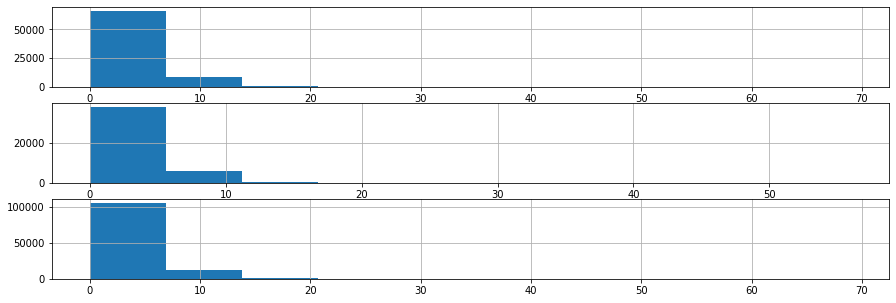

In [ ]:
###Distribution of total nights stayed if customers cancel or complete their bookings
plt.subplot(3, 1, 1)
completed_bookings['total_nights_stayed'].hist()
plt.subplot(3, 1, 2)
cancelled_bookings['total_nights_stayed'].hist()
plt.subplot(3, 1, 3)
hotel_bookings['total_nights_stayed'].hist()
plt.show()

/shared-libs/python3.7/py/lib/python3.7/site-packages/matplotlib/collections.py:982: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


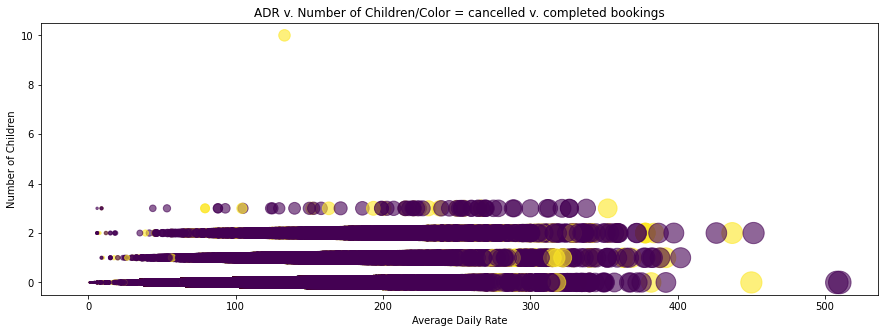

In [ ]:
plt.scatter(x=hotel_bookings['adr'], y=hotel_bookings['children'], 
            s=hotel_bookings['adr'], alpha=0.6, 
            cmap='viridis', c=hotel_bookings['is_canceled'])
plt.xlabel('Average Daily Rate')
plt.ylabel('Number of Children')
plt.title('ADR v. Number of Children/Color = cancelled v. completed bookings')
plt.show()

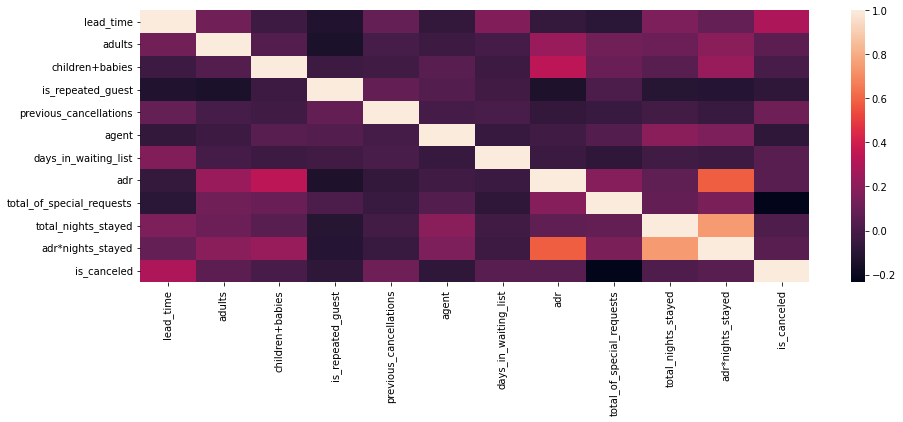

In [ ]:
corr_hotel_bookings = hotel_bookings_model.corr()
sns.heatmap(corr_hotel_bookings)
plt.show()

<h5>Ok.. time to go into some feature engineering. We would like to assign our object or categorical data types some numerical value by using hot encoding in order to include them in our correlation analysis and logisitic regression model. We have one column with several nulls we will take care of, convert our categorical columns using an encoder, and do some simple feature engineering on a few of our variables.</h5>

In [ ]:
###Feature engineering special request classifying those who made one more special requests (analysis in separate notebook)
conditions_2 = [
    (hotel_bookings_model['total_of_special_requests'] >= 1),
    (hotel_bookings_model['total_of_special_requests'] < 1)
    ]

values_2 = [1, 0]

hotel_bookings_model['1_or_more_special_request'] = np.select(conditions_2, values_2)
hotel_bookings_model.drop(columns = ['total_of_special_requests'])

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,hotel,lead_time,adults,children+babies,country,market_segment,is_repeated_guest,previous_cancellations,reserved_room_type,deposit_type,agent,days_in_waiting_list,customer_type,adr,total_nights_stayed,adr*nights_stayed,arrival_date_month,is_canceled,1_or_more_special_request
0,Resort Hotel,342,2,0.0,PRT,Direct,0,0,C,No Deposit,NaN,0,Transient,0.00,0,0.00,July,0,0
1,Resort Hotel,737,2,0.0,PRT,Direct,0,0,C,No Deposit,NaN,0,Transient,0.00,0,0.00,July,0,0
2,Resort Hotel,7,1,0.0,GBR,Direct,0,0,A,No Deposit,NaN,0,Transient,75.00,1,75.00,July,0,0
3,Resort Hotel,13,1,0.0,GBR,Corporate,0,0,A,No Deposit,304.0,0,Transient,75.00,1,75.00,July,0,0
4,Resort Hotel,14,2,0.0,GBR,Online TA,0,0,A,No Deposit,240.0,0,Transient,98.00,2,196.00,July,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,23,2,0.0,BEL,Offline TA/TO,0,0,A,No Deposit,394.0,0,Transient,96.14,7,672.98,August,0,0
119386,City Hotel,102,3,0.0,FRA,Online TA,0,0,E,No Deposit,9.0,0,Transient,225.43,7,1578.01,August,0,1
119387,City Hotel,34,2,0.0,DEU,Online TA,0,0,D,No Deposit,9.0,0,Transient,157.71,7,1103.97,August,0,1
119388,City Hotel,109,2,0.0,GBR,Online TA,0,0,A,No Deposit,89.0,0,Transient,104.40,7,730.80,August,0,0


In [ ]:
###starting with fill NA data frame (taking care of NAN in agent column with 0 for "unkown agents")
hotel_bookings_model.fillna(0)

,hotel,lead_time,adults,children+babies,country,market_segment,is_repeated_guest,previous_cancellations,reserved_room_type,deposit_type,agent,days_in_waiting_list,customer_type,adr,total_of_special_requests,total_nights_stayed,adr*nights_stayed,arrival_date_month,is_canceled,1_or_more_special_request
0,Resort Hotel,342,2,0.0,PRT,Direct,0,0,C,No Deposit,0.0,0,Transient,0.00,0,0,0.00,July,0,0
1,Resort Hotel,737,2,0.0,PRT,Direct,0,0,C,No Deposit,0.0,0,Transient,0.00,0,0,0.00,July,0,0
2,Resort Hotel,7,1,0.0,GBR,Direct,0,0,A,No Deposit,0.0,0,Transient,75.00,0,1,75.00,July,0,0
3,Resort Hotel,13,1,0.0,GBR,Corporate,0,0,A,No Deposit,304.0,0,Transient,75.00,0,1,75.00,July,0,0
4,Resort Hotel,14,2,0.0,GBR,Online TA,0,0,A,No Deposit,240.0,0,Transient,98.00,1,2,196.00,July,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,23,2,0.0,BEL,Offline TA/TO,0,0,A,No Deposit,394.0,0,Transient,96.14,0,7,672.98,August,0,0
119386,City Hotel,102,3,0.0,FRA,Online TA,0,0,E,No Deposit,9.0,0,Transient,225.43,2,7,1578.01,August,0,1
119387,City Hotel,34,2,0.0,DEU,Online TA,0,0,D,No Deposit,9.0,0,Transient,157.71,4,7,1103.97,August,0,1
119388,City Hotel,109,2,0.0,GBR,Online TA,0,0,A,No Deposit,89.0,0,Transient,104.40,0,7,730.80,August,0,0


In [ ]:
###converting agent column to object type
hotel_bookings_model['agent'] = hotel_bookings_model.agent.astype(object)
hotel_bookings_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119389 entries, 0 to 119389
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   hotel                      119389 non-null  object 
 1   lead_time                  119389 non-null  int64  
 2   adults                     119389 non-null  int64  
 3   children+babies            119385 non-null  float64
 4   country                    118901 non-null  object 
 5   market_segment             119389 non-null  object 
 6   is_repeated_guest          119389 non-null  int64  
 7   previous_cancellations     119389 non-null  int64  
 8   reserved_room_type         119389 non-null  object 
 9   deposit_type               119389 non-null  object 
 10  agent                      103049 non-null  object 
 11  days_in_waiting_list       119389 non-null  int64  
 12  customer_type              119389 non-null  object 
 13  adr                        11

<h5>Time to reshape categorical fields using get_dumies() in one hot encoding format... </h5>

In [ ]:
hotel_bookings_model.hotel.unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [ ]:
one_hot_encoded_data = pd.get_dummies(hotel_bookings_model, columns = ['hotel', 'country', 'market_segment', 'deposit_type', 'agent', 'reserved_room_type', 'customer_type', 'arrival_date_month'])
print(one_hot_encoded_data)

        lead_time  adults  children+babies  is_repeated_guest  \
0             342       2              0.0                  0   
1             737       2              0.0                  0   
2               7       1              0.0                  0   
3              13       1              0.0                  0   
4              14       2              0.0                  0   
...           ...     ...              ...                ...   
119385         23       2              0.0                  0   
119386        102       3              0.0                  0   
119387         34       2              0.0                  0   
119388        109       2              0.0                  0   
119389        205       2              0.0                  0   

        previous_cancellations  days_in_waiting_list     adr  \
0                            0                     0    0.00   
1                            0                     0    0.00   
2                          

In [ ]:
one_hot_encoded_data

,lead_time,adults,children+babies,is_repeated_guest,previous_cancellations,days_in_waiting_list,adr,total_of_special_requests,total_nights_stayed,adr*nights_stayed,...,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September
0,342,2,0.0,0,0,0,0.00,0,0,0.00,...,0,0,0,1,0,0,0,0,0,0
1,737,2,0.0,0,0,0,0.00,0,0,0.00,...,0,0,0,1,0,0,0,0,0,0
2,7,1,0.0,0,0,0,75.00,0,1,75.00,...,0,0,0,1,0,0,0,0,0,0
3,13,1,0.0,0,0,0,75.00,0,1,75.00,...,0,0,0,1,0,0,0,0,0,0
4,14,2,0.0,0,0,0,98.00,1,2,196.00,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,23,2,0.0,0,0,0,96.14,0,7,672.98,...,0,0,0,0,0,0,0,0,0,0
119386,102,3,0.0,0,0,0,225.43,2,7,1578.01,...,0,0,0,0,0,0,0,0,0,0
119387,34,2,0.0,0,0,0,157.71,4,7,1103.97,...,0,0,0,0,0,0,0,0,0,0
119388,109,2,0.0,0,0,0,104.40,0,7,730.80,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
one_hot_encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119389 entries, 0 to 119389
Columns: 561 entries, lead_time to arrival_date_month_September
dtypes: float64(3), int64(9), uint8(549)
memory usage: 74.3 MB


In [ ]:
one_hot_encoded_data = one_hot_encoded_data.dropna()

<h3>Time to Fit our Logisitic Regression Model</h3> 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [ ]:
independent_variables = one_hot_encoded_data.drop(columns = ['is_canceled'])
dependent_variable = one_hot_encoded_data['is_canceled']

In [ ]:
independent_variables.isna().sum()

lead_time                       0
adults                          0
children+babies                 0
is_repeated_guest               0
previous_cancellations          0
                               ..
arrival_date_month_March        0
arrival_date_month_May          0
arrival_date_month_November     0
arrival_date_month_October      0
arrival_date_month_September    0
Length: 560, dtype: int64

In [ ]:
independent_train,independent_test,dependent_train,dependent_test=train_test_split(independent_variables,dependent_variable,test_size=0.25,random_state=0)

In [ ]:
model_logistic_regression = LogisticRegression()
model_logistic_regression.fit(independent_train, dependent_train)
logisitc_prediction = model_logistic_regression.predict(independent_test)

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


<h5>The Logistic Regression Model has been fit and now we will use a confusion matrix to check the precision and accuracy, and recall of the model</h5>

In [ ]:
evaluation_matrix = metrics.confusion_matrix(dependent_test, logisitc_prediction)

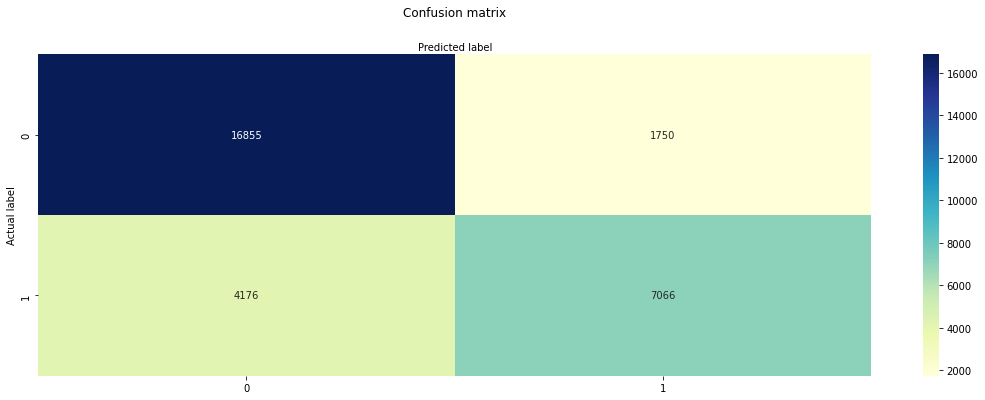

In [ ]:
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(evaluation_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

<h5>Precision and Accuracy Score of %80.14 and recall of %62.85</h5>

<h3>Coefficient Analysis</h3>

In [ ]:
coef_array = model_logistic_regression.coef_
coef_array = coef_array.flatten()

coef_df = pd.DataFrame()
coef_df['independent_variables'] = one_hot_encoded_data.drop(columns = ['is_canceled']).columns
coef_df['coef'] = coef_array
coef_df

,independent_variables,coef
0,lead_time,0.005662
1,adults,-0.017736
2,children+babies,0.001425
3,is_repeated_guest,-0.225665
4,previous_cancellations,0.572240
...,...,...
555,arrival_date_month_March,-0.045482
556,arrival_date_month_May,-0.015523
557,arrival_date_month_November,-0.053471
558,arrival_date_month_October,-0.049724


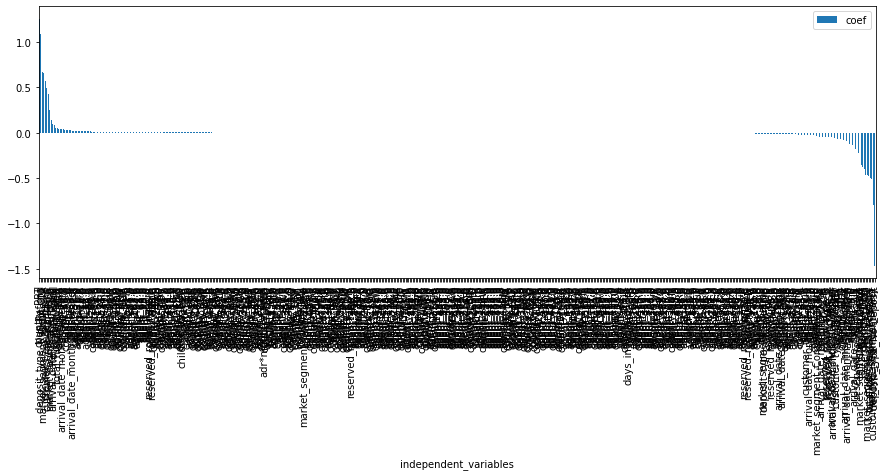

In [ ]:
coef_df.sort_values(by='coef', ascending=False).set_index('independent_variables').plot.bar()
plt.show()

In [ ]:
coef_df.nlargest(n=10, columns=['coef'])

,independent_variables,coef
148,country_PRT,1.254288
199,deposit_type_Non Refund,1.088473
209,agent_9.0,0.667773
196,market_segment_Online TA,0.651547
4,previous_cancellations,0.572240
546,customer_type_Transient,0.493483
374,agent_240.0,0.422453
194,market_segment_Groups,0.247251
201,agent_1.0,0.137837
548,arrival_date_month_April,0.095936


In [ ]:
coef_df.nsmallest(n=10, columns=['coef'])

,independent_variables,coef
198,deposit_type_No Deposit,-1.464199
547,customer_type_Transient-Party,-0.791916
193,market_segment_Direct,-0.512273
7,total_of_special_requests,-0.498785
10,1_or_more_special_request,-0.476324
195,market_segment_Offline TA/TO,-0.468819
12,hotel_Resort Hotel,-0.467773
56,country_DEU,-0.395243
72,country_GBR,-0.379735
69,country_FRA,-0.353327


<h5>Using our Logisitic Regeression Model, we are able to find our top 10 variables that are positively associated with booking cancellations and top 10 variables that are negatively associated to booking cancellations. Enjoy!</h5>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7155300b-c362-4918-8dea-6c233a607a43' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>